In [1]:
%load_ext autoreload

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import FootballClf
from FixturesOdds import FixturesOdds

In [4]:
fixture_cols=['FixtureDateAsDate','HomeTeam', 'AwayTeam']
odds_cols=['HomeOdds', 'DrawOdds', 'AwayOdds']
predict_cols=['prediction']
result_cols=['HomeTeamResult']
bet_results_cols=['stake', 'applic_odds', 'betprofit']

In [5]:
def summary(fix, agg_level):
    grouper = fix.df.groupby(fix.df.FixtureDateAsDate.dt.to_period(agg_level).dt.start_time)
    df = pd.DataFrame(grouper.betprofit.sum())
    df['stake'] = grouper.stake.sum()
    df['betting_account'] = df.betprofit.cumsum()
    
    return df

In [6]:
def get_a_predictor(Refresh=False, clf_name='betting clf_2.2'):
    fix_pred=FixturesOdds()
    fix_pred.fix_load('vwCSV_3','vwCSV_3.csv', Refresh) # no reresh
    fix_pred.do_calcs()
    fix_pred.clean_predict()
    X=fix_pred.X()
    c=FootballClf.FootballClf()
    clf=c.load_by_name(clf_name)
    fix_pred.df['prediction'] = clf.predict(fix_pred.X())
    fix_pred.calc_bet_results(1)
    
    return fix_pred

In [7]:
fix_pred=FixturesOdds()
fix_pred.fix_load('vwCSV_3','vwCSV_3.csv', False) # no reresh
fix_pred.do_calcs()
fix_pred.clean_predict()

In [8]:
X=fix_pred.X()
c=FootballClf.FootballClf()
clf=c.load_by_name('betting clf_2.2')

In [9]:
fix_pred.df['prediction'] = clf.predict(fix_pred.X())

In [10]:
fix_pred.calc_bet_results(1)

In [11]:
fix_pred = get_a_predictor()

In [12]:
fix_pred.filter_by_col('season',2018).filter_by_col('leagueid', [1,2])

In [14]:
summary(fix_pred, 'W')

,betprofit,stake,betting_account
FixtureDateAsDate,,,
2018-08-06,7.69,-14,7.69
2018-08-13,9.44,-21,17.13
2018-08-20,13.44,-32,30.57
2018-08-27,7.65,-23,38.22
2018-09-10,15.25,-21,53.47
2018-09-17,21.97,-35,75.44
2018-09-24,4.47,-21,79.91
2018-10-01,11.85,-35,91.76
2018-10-15,-1.07,-21,90.69


In [12]:
# now we will exclude fixtures where the predicted result is less than 0.5

In [29]:
fix_pred.filter_by_col('HomeTeamResult','D')

In [46]:
df =fix_pred.df
print ('Percentage of all'(df.HomeTeamResult=='D').sum()/(df.HomeTeamResult).count()

0.27469135802469136

In [180]:
pd.crosstab([fix_pred.df.leagueid, fix_pred.df.prediction], fix_pred.df.HomeTeamResult, margins=True)

HomeTeamResult        D   L    W  All
leagueid prediction                  
1        L           10  27    9   46
         W           16  16   42   74
2        L           21  24   21   66
         W           42  28   68  138
All                  89  95  140  324

In [184]:
pd.crosstab([fix_pred.df.leagueid, fix_pred.df.prediction], fix_pred.df.HomeTeamResult, normalize='columns')

HomeTeamResult              D         L         W
leagueid prediction                              
1        L           0.112360  0.284211  0.064286
         W           0.179775  0.168421  0.300000
2        L           0.235955  0.252632  0.150000
         W           0.471910  0.294737  0.485714

In [181]:
pd.crosstab([fix_pred.df.leagueid, fix_pred.df.prediction], fix_pred.df.HomeTeamResult, margins=True).apply(lambda r: r/r.sum(), axis=1)

HomeTeamResult              D         L         W  All
leagueid prediction                                   
1        L           0.108696  0.293478  0.097826  0.5
         W           0.108108  0.108108  0.283784  0.5
2        L           0.159091  0.181818  0.159091  0.5
         W           0.152174  0.101449  0.246377  0.5
All                  0.137346  0.146605  0.216049  0.5

In [185]:
# how to decide if we are going to bet on two teams that are very similar?  Home advantage?

In [19]:
fix_pred = get_a_predictor()
fix_pred.filter_by_col('HomeTeamResult','D')

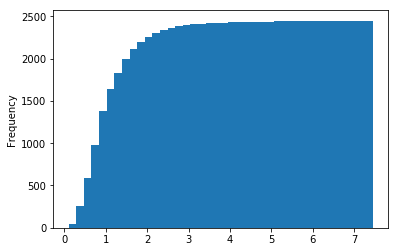

In [20]:
fix_pred.df.ExpectedResult.plot.hist(bins=40,cumulative=True)

In [27]:
pd.crosstab([fix_pred.df.leagueid, fix_pred.df.binned], fix_pred.df.binned, margins=True)

TypeError: Cannot cast Index to dtype float64

In [38]:
fix_pred = get_a_predictor()
bins=[0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,100]
fix_pred.df['binned'] = pd.cut(fix_pred.df.ExpectedResult, bins)


In [39]:
pd.crosstab(fix_pred.df['binned'],fix_pred.df.HomeTeamResult)

HomeTeamResult,D,L,W
binned,,,
"(0.5, 0.6]",188,221,248
"(0.6, 0.7]",208,276,273
"(0.7, 0.8]",203,234,258
"(0.8, 0.9]",233,248,331
"(0.9, 1.0]",219,222,311
"(1.0, 2.0]",874,918,1623
"(2.0, 3.0]",180,151,408
"(3.0, 4.0]",29,31,92
"(4.0, 100.0]",22,14,74
